<a href="https://colab.research.google.com/github/Krishna421808/Charts/blob/main/power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read in the Excel file

df= pd.read_excel('sample_data/DatabaseForPowerV4.xlsx', sheet_name='Database')

PY_total= df.loc[df['Year']=='PY', 'Amount'].sum()
Actual_total=df.loc[df['Year']=='Actual', 'Amount'].sum()
grouped=df.groupby('BU')['Amount'].sum()

actual_df = df[df['Year'] == 'Actual']

# Group by the "BU" column and calculate the difference in sum of "Amount" for "Actual" and "PY" years
result = actual_df.groupby('BU')['Amount'].sum() - df[df['Year'] == 'PY'].groupby('BU')['Amount'].sum()
result=result.sort_values(ascending=False)

x=['PY']+result.index.tolist()+['Actual']
y=[PY_total]+result.tolist()+[Actual_total]

# Define the text template for the bar labels
text_template = ['{:.2f}'.format(val) if val is not None else '' for val in y]

fig=go.Figure(go.Waterfall(
    x=x,
    y=y,
    measure=['absolute','relative','relative','relative','relative','relative','relative','relative','relative','relative','relative',
              'relative','relative','relative','relative','relative','total'],
    text=text_template,
    textposition='outside',
    texttemplate='%{text}',
    decreasing = {"marker":{"color":"Maroon", "line":{"color":"red", "width":2}}},
    increasing = {"marker":{"color":"Teal"}},
    totals = {"marker":{"color":"deep sky blue", "line":{"color":"blue", "width":3}}},
))
fig.update_layout(title = "Waterfall", waterfallgap = 0.3,xaxis_title="Year", yaxis_title="Sum of Amount")

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# read the Excel file into a pandas dataframe

df= pd.read_excel('sample_data/DatabaseForPowerV4.xlsx', sheet_name='Database')


# filter the dataframe to only include rows where P&L head is Ebidta
df_ebidta = df[df['P&L Head'] == 'EBIDTA']

# calculate the sum of the amount for each BU in Actual and PY
sum_budget = df_ebidta[df_ebidta['Year'] == 'Budget'].groupby('BU')['Amount'].sum()
sum_Actual = df_ebidta[df_ebidta['Year'] == 'Actual'].groupby('BU')['Amount'].sum()

sum_EB=df_ebidta[df_ebidta['Year']=='Budget']['Amount'].sum()
sum_EA=df_ebidta[df_ebidta['Year']=='Actual']['Amount'].sum()

# calculate the difference between the sums
diff = sum_Actual - sum_budget

x=['Ebidta\n Budget']+diff.index.tolist()+['Ebidta\nActual']
y=[sum_EB]+diff.tolist()+[sum_EA]

# Define the text template for the bar labels
text_template = ['{:.2f}'.format(val) if val is not None else '' for val in y]

fig=go.Figure(go.Waterfall(
    x=x,
    y=y,
    measure=['absolute','relative','relative','relative','relative','relative','relative','relative','relative','relative','relative',
              'relative','relative','relative','relative','relative','total'],
    text=text_template,
    textposition='outside',
    texttemplate='%{text}',
    decreasing = {"marker":{"color":"Maroon", "line":{"color":"red", "width":2}}},
    increasing = {"marker":{"color":"Teal"}},
    totals = {"marker":{"color":"deep sky blue", "line":{"color":"blue", "width":3}}},
))
fig.update_layout(title = "Waterfall", waterfallgap = 0.3,xaxis_title="Year", yaxis_title="Sum of Amount")

fig.show()

In [ ]:
import pandas as pd 
import plotly.graph_objects as go

df= pd.read_excel('sample_data/Dashboard_V44.xlsm', sheet_name='Database')
start_month = pd.to_datetime('Jan-23', format='%b-%y')
end_month = pd.to_datetime('Mar-23', format='%b-%y')
 
filtered_df_Budget=df[(df['BU with Numbering']=='b. US')&(df['Year']=='Bdgt.') & (pd.to_datetime(df['Month'], format='%b-%y').between(start_month, end_month))]

filtered_df_Actual=df[(df['BU with Numbering']=='b. US')&(df['Year']=='Act.') & (pd.to_datetime(df['Month'], format='%b-%y').between(start_month, end_month))]

result_df_Budget = filtered_df_Budget.groupby('P&L Head')['Amount'].sum()
result_df_Actual = filtered_df_Actual.groupby('P&L Head')['Amount'].sum()
# print(result_df_Budget,"\n\n")
# print(result_df_Actual,"\n\n")

result=result_df_Actual-result_df_Budget

result=pd.Series({'GC':result['GC'],'HR Cost':result['HR Cost'],'Mfg Cost':result['Mfg Cost'],'Regul. & Admin.':result['Regul. & Admin.'],'Mktg. Exps.':result['Mktg. Exps.'],'S&D Exps.':result['S&D Exps.'],'R&D Cost':result['R&D Cost'],'OI, Savings & Corp. Allo.':result['OI, Savings & Corp. Allo.'],})

x=['Ebidta\n Budget']+result.index.tolist()+['Ebidta\nActual']
y=[result_df_Budget['EBIDTA After R&D']]+result.tolist()+[result_df_Actual['EBIDTA After R&D']]

text_template = ['{:.2f}'.format(val) if val is not None else '' for val in y]

fig=go.Figure(go.Waterfall(
    x=x,
    y=y,
    measure=['absolute','relative','relative','relative','relative','relative','relative','relative','relative','total'],
    text=text_template,
    textposition='outside',
    texttemplate='%{text}',
    decreasing = {"marker":{"color":"Maroon", "line":{"color":"red", "width":2}}},
    increasing = {"marker":{"color":"Teal"}},
    totals = {"marker":{"color":"deep sky blue", "line":{"color":"blue", "width":3}}},
))
fig.update_layout(title = "Waterfall", waterfallgap = 0.3,xaxis_title="Year", yaxis_title="Sum of Amount")

fig.show()




In [ ]:
import pandas as pd 
import plotly.graph_objects as go

df= pd.read_excel('sample_data/Dashboard_V44.xlsm', sheet_name='Database')
start_month = '01-01-2023'
end_month = '31-03-2023'
 
filtered_df_Budget=df[(df['BU with Numbering']=='b. US')&(df['Year']=='Bdgt.') & (df['Month']).between(start_month, end_month)]

filtered_df_Actual=df[(df['BU with Numbering']=='b. US')&(df['Year']=='Act.') & (df['Month']).between(start_month, end_month)]

result_df_Budget = filtered_df_Budget.groupby('P&L Head')['Amount'].sum()
result_df_Actual = filtered_df_Actual.groupby('P&L Head')['Amount'].sum()
# print(result_df_Budget,"\n\n")
# print(result_df_Actual,"\n\n")

result=result_df_Actual-result_df_Budget

result=pd.Series({'GC':result['GC'],'HR Cost':result['HR Cost'],'Mfg Cost':result['Mfg Cost'],'Regul. & Admin.':result['Regul. & Admin.'],'Mktg. Exps.':result['Mktg. Exps.'],'S&D Exps.':result['S&D Exps.'],'R&D Cost':result['R&D Cost'],'OI, Savings & Corp. Allo.':result['OI, Savings & Corp. Allo.'],})

x=['Ebidta\n Budget']+result.index.tolist()+['Ebidta\nActual']
y=[result_df_Budget['EBIDTA After R&D']]+result.tolist()+[result_df_Actual['EBIDTA After R&D']]

text_template = ['{:.2f}'.format(val) if val is not None else '' for val in y]

fig=go.Figure(go.Waterfall(
    x=x,
    y=y,
    measure=['absolute','relative','relative','relative','relative','relative','relative','relative','relative','total'],
    text=text_template,
    textposition='outside',
    texttemplate='%{text}',
    decreasing = {"marker":{"color":"Maroon", "line":{"color":"red", "width":2}}},
    increasing = {"marker":{"color":"Teal"}},
    totals = {"marker":{"color":"deep sky blue", "line":{"color":"blue", "width":3}}},
))
fig.update_layout(title = "Waterfall", waterfallgap = 0.3,xaxis_title="Year", yaxis_title="Sum of Amount")

fig.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning:

Parsing '31-03-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



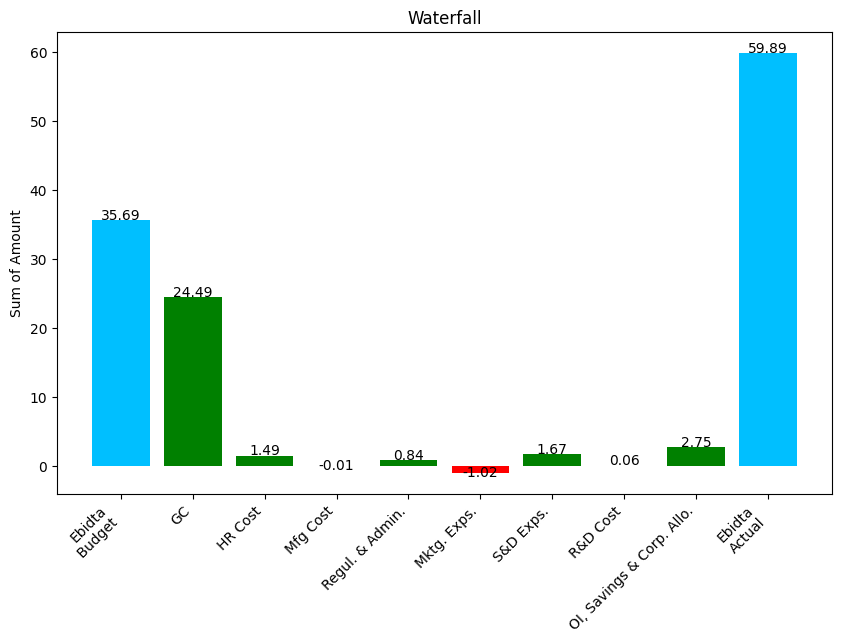

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_excel('sample_data/Dashboard_V44.xlsm', sheet_name='Database')
start_month = pd.to_datetime('Jan-23', format='%b-%y')
end_month = pd.to_datetime('Mar-23', format='%b-%y')
 
filtered_df_Budget=df[(df['BU with Numbering']=='f. EM')&(df['Year']=='Bdgt.') & (pd.to_datetime(df['Month'], format='%b-%y').between(start_month, end_month))]

filtered_df_Actual=df[(df['BU with Numbering']=='f. EM')&(df['Year']=='Act.') & (pd.to_datetime(df['Month'], format='%b-%y').between(start_month, end_month))]

result_df_Budget = filtered_df_Budget.groupby('P&L Head')['Amount'].sum()
result_df_Actual = filtered_df_Actual.groupby('P&L Head')['Amount'].sum()

result=result_df_Actual-result_df_Budget

result=pd.Series({'GC':result['GC'],'HR Cost':result['HR Cost'],'Mfg Cost':result['Mfg Cost'],'Regul. & Admin.':result['Regul. & Admin.'],'Mktg. Exps.':result['Mktg. Exps.'],'S&D Exps.':result['S&D Exps.'],'R&D Cost':result['R&D Cost'],'OI, Savings & Corp. Allo.':result['OI, Savings & Corp. Allo.'],})

# Create the x and y lists
x=['Ebidta\n Budget']+result.index.tolist()+['Ebidta\nActual']
y=[result_df_Budget['EBIDTA After R&D']]+result.tolist()+[result_df_Actual['EBIDTA After R&D']]

# Create the labels for the bars
labels = [f"{val:.2f}" if val is not None else '' for val in y]

# Create the colors list
colors = ['deepskyblue' if label in ('Ebidta\n Budget', 'Ebidta\nActual') else 'red' if val < 0 else 'green' for label, val in zip(x, y)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sum of Amount')
plt.title('Waterfall')

# Add the labels to the bars
for i, label in enumerate(labels):
    if label:
        if y[i] > 0:
            plt.text(i, y[i]+0.1, label, ha='center')
        else:
            plt.text(i, y[i]-0.5, label, ha='center')

# Show the plot
plt.show()


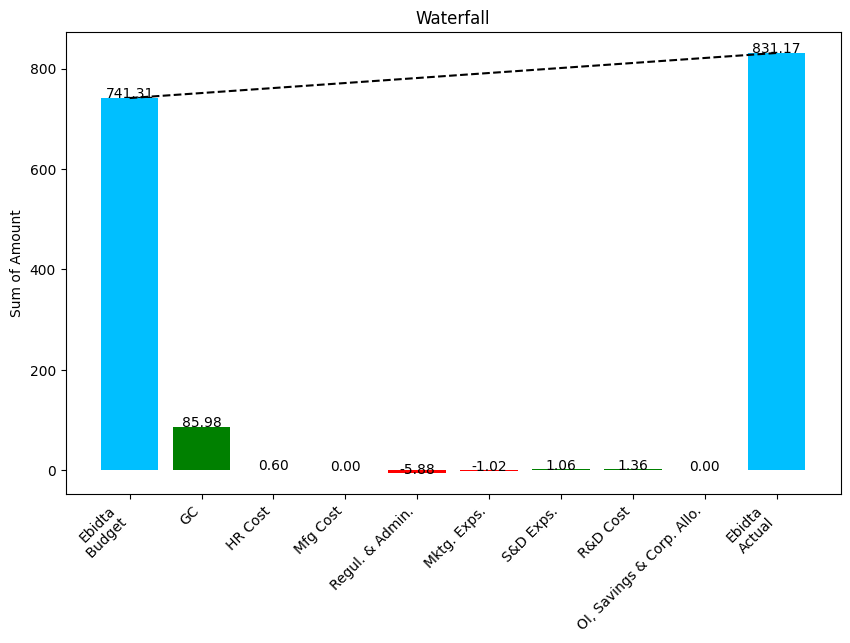

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_excel('sample_data/Dashboard_V44.xlsm', sheet_name='Database')
start_month = pd.to_datetime('Jan-23', format='%b-%y')
end_month = pd.to_datetime('Mar-23', format='%b-%y')
 
filtered_df_Budget=df[(df['BU with Numbering']=='b. US')&(df['Year']=='Bdgt.') & (pd.to_datetime(df['Month'], format='%b-%y').between(start_month, end_month))]

filtered_df_Actual=df[(df['BU with Numbering']=='b. US')&(df['Year']=='Act.') & (pd.to_datetime(df['Month'], format='%b-%y').between(start_month, end_month))]

result_df_Budget = filtered_df_Budget.groupby('P&L Head')['Amount'].sum()
result_df_Actual = filtered_df_Actual.groupby('P&L Head')['Amount'].sum()

result=result_df_Actual-result_df_Budget

result=pd.Series({'GC':result['GC'],'HR Cost':result['HR Cost'],'Mfg Cost':result['Mfg Cost'],'Regul. & Admin.':result['Regul. & Admin.'],'Mktg. Exps.':result['Mktg. Exps.'],'S&D Exps.':result['S&D Exps.'],'R&D Cost':result['R&D Cost'],'OI, Savings & Corp. Allo.':result['OI, Savings & Corp. Allo.'],})

# Create the x and y lists
# Create the x and y lists
x = ['Ebidta\n Budget'] + result.index.tolist() + ['Ebidta\nActual']
y = [result_df_Budget['EBIDTA After R&D']] + result.tolist() + [result_df_Actual['EBIDTA After R&D']]

# Create the labels for the bars
labels = [f"{val:.2f}" if val is not None else '' for val in y]

# Create the colors list
colors = ['deepskyblue' if label in ('Ebidta\n Budget', 'Ebidta\nActual') else 'red' if val < 0 else 'green' for label, val in zip(x, y)]

# Create the plot
plt.figure(figsize=(10, 6))

# Add the bars
plt.bar(x, y, color=colors)

# Add the line connecting the bars
plt.plot([x[0], x[-1]], [y[0], y[-1]], color='black', linestyle='--')

# Add the labels to the bars
for i, label in enumerate(labels):
    if label:
        if y[i] > 0:
            plt.text(i, y[i]+0.1, label, ha='center')
        else:
            plt.text(i, y[i]-0.5, label, ha='center')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Sum of Amount')
plt.title('Waterfall')

plt.show()


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning:

Parsing '31-03-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



GC                           85.979155
HR Cost                       0.604149
Mfg Cost                      0.000000
Regul. & Admin.              -5.877709
Mktg. Exps.                  -1.024011
S&D Exps.                     1.062161
R&D Cost                      1.363268
OI, Savings & Corp. Allo.     0.000000
dtype: float64


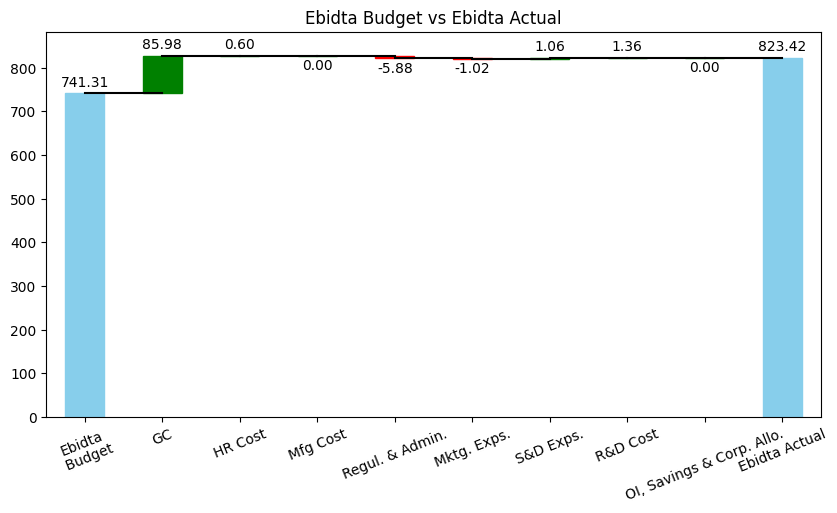

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df= pd.read_excel('sample_data/Dashboard_V44.xlsm', sheet_name='Database')
start_month = '01-01-2023'
end_month = '31-03-2023'
 
filtered_df_Budget=df[(df['BU with Numbering']=='b. US')&(df['Year']=='Bdgt.') & (df['Month']).between(start_month, end_month)]

filtered_df_Actual=df[(df['BU with Numbering']=='b. US')&(df['Year']=='Act.') & (df['Month']).between(start_month, end_month)]

result_df_Budget = filtered_df_Budget.groupby('P&L Head')['Amount'].sum()
result_df_Actual = filtered_df_Actual.groupby('P&L Head')['Amount'].sum()

result = result_df_Actual- result_df_Budget

result=pd.Series({'GC':result['GC'],'HR Cost':result['HR Cost'],'Mfg Cost':result['Mfg Cost'],'Regul. & Admin.':result['Regul. & Admin.'],'Mktg. Exps.':result['Mktg. Exps.'],'S&D Exps.':result['S&D Exps.'],'R&D Cost':result['R&D Cost'],'OI, Savings & Corp. Allo.':result['OI, Savings & Corp. Allo.']})

index= ['Ebidta\n Budget'] + result.index.tolist()
data = {'amount': [result_df_Budget['EBIDTA After R&D']] + result.tolist()}

trans = pd.DataFrame(data=data,index=index)
blank = trans.amount.cumsum().shift(1).fillna(0)

#Get the net total number for the final element in the waterfall
total = trans.sum().amount
trans.loc["Ebidta Actual"]= total
blank.loc["Ebidta Actual"] = total

#The steps graphically show the levels as well as used for label placement
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

blank.loc["Ebidta Actual"] = 0
#Plot and label

colors = ['skyblue'] + ['green' if val >= 0 else 'red' for val in trans.values[1:]]
my_plot = trans.plot(kind='bar', stacked=True, bottom=blank, legend=None, figsize=(10, 5), title="Ebidta Budget vs Ebidta Actual")
for i, patch in enumerate(my_plot.containers):
    for j, bar in enumerate(patch):
        bar.set_color(colors[j])
my_plot.patches[-1].set_color('skyblue')        
#Get the y-axis position for the labels
y_height = trans.amount.cumsum().shift(1).fillna(0)

#Get an offset so labels don't sit right on top of the bar
max = trans.max()
neg_offset = max / 25
pos_offset = max / 50
plot_offset = int(max / 15)

#Start label loop
loop = 0
for index, row in trans.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    my_plot.annotate("{:,.2f}".format(row['amount']),(loop,y),ha="center")
    loop+=1

#Scale up the y axis so there is room for the labels
my_plot.set_ylim(0,blank.max()+int(plot_offset))
#Rotate the labels
my_plot.set_xticklabels(trans.index,rotation=22)
my_plot.plot(step.index, step.values,'k')

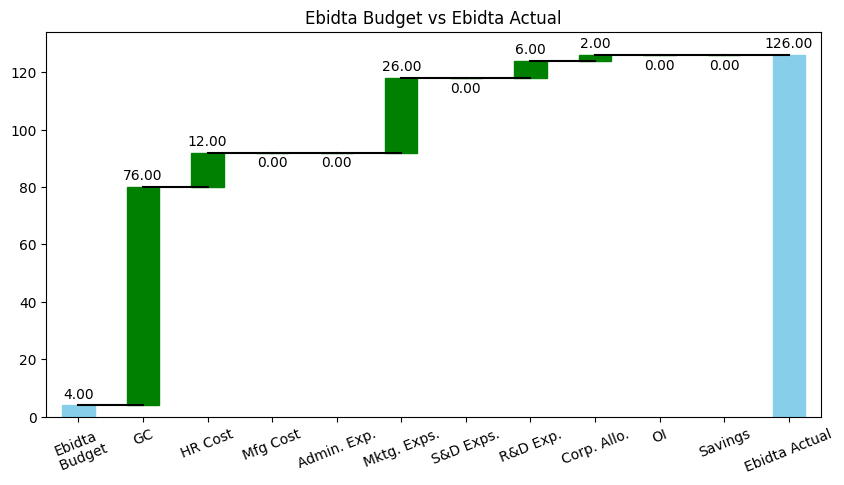

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df= pd.read_excel('sample_data/Dataset_new.xlsx')
start_month = '01-01-2023'
end_month = '01-01-2023'
 
filtered_df_Budget=df[(df['BU']=='Biologics')&(df['Year']=='Budget') & (df['Month']).between(start_month, end_month)]

filtered_df_Actual=df[(df['BU']=='Biologics')&(df['Year']=='Actual') & (df['Month']).between(start_month, end_month)]

result_df_Budget = filtered_df_Budget.groupby('p&l_head_lookup')['EBITDA_WF'].sum()
result_df_Actual = filtered_df_Actual.groupby('p&l_head_lookup')['EBITDA_WF'].sum()

GC_result=result_df_Actual['3. GC']-result_df_Budget['3. GC']
result=result_df_Budget-result_df_Actual

result=pd.Series({'GC':GC_result,'HR Cost':result['5. HR Cost'],'Mfg Cost':result['6. Mfg. Cost'],'Admin. Exp.':result['8. Admin. Exp.'],'Mktg. Exps.':result['9. Mktg. Exp.'],'S&D Exps.':result['10. S&D Exp.'],'R&D Exp.':result['12. R&D Exp.'],'Corp. Allo.':result['13. Corp. Allo.'],'OI':result['4. OI'],'Savings':result['11. Savings']})

index= ['Ebidta\n Budget'] + result.index.tolist()
data = {'amount': [result_df_Budget['15. EBIDTA']] + result.tolist()}

trans = pd.DataFrame(data=data,index=index)
blank = trans.amount.cumsum().shift(1).fillna(0)

#Get the net total number for the final element in the waterfall
total = trans.sum().amount
trans.loc["Ebidta Actual"]= total
blank.loc["Ebidta Actual"] = total

#The steps graphically show the levels as well as used for label placement
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

blank.loc["Ebidta Actual"] = 0
#Plot and label

colors = ['skyblue'] + ['green' if val >= 0 else 'red' for val in trans.values[1:]]
my_plot = trans.plot(kind='bar', stacked=True, bottom=blank, legend=None, figsize=(10, 5), title="Ebidta Budget vs Ebidta Actual")
for i, patch in enumerate(my_plot.containers):
    for j, bar in enumerate(patch):
        bar.set_color(colors[j])
my_plot.patches[-1].set_color('skyblue')        
#Get the y-axis position for the labels
y_height = trans.amount.cumsum().shift(1).fillna(0)

#Get an offset so labels don't sit right on top of the bar
max = trans.max()
neg_offset = max / 25
pos_offset = max / 50
plot_offset = int(max / 15)

#Start label loop
loop = 0
for index, row in trans.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    my_plot.annotate("{:,.2f}".format(row['amount']),(loop,y),ha="center")
    loop+=1

#Scale up the y axis so there is room for the labels
my_plot.set_ylim(0,blank.max()+int(plot_offset))
#Rotate the labels
my_plot.set_xticklabels(trans.index,rotation=22)
my_plot.plot(step.index, step.values,'k')